In [1]:
import pandas as pd
pd.options.display.max_colwidth = 1
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

# Описание проекта.
Вместе с отделом маркетинга подготовиить список гипотез для увеличения выручки интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
В ходе теста принять решение по остановке или продолжению эксперимента, выбрать сегмент наиболее успешный сегмент, если это возможно сделать. Исследовать выручку и средний чек, количество заказов.

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
print(data.info()) #ознакомился с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [3]:
data.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
df = pd.DataFrame(data)
df.columns = df.columns.str.lower()
df.head(9) #привел к нижнему регистру названия колонок

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data['ICE'] = data['impact'] * data['confidence']/data['efforts']
data['ICE'] = data['ICE'].astype('float')
data['ICE'] = data['ICE'].round(3)
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)) #применил фреймворк ICE для приоритизации гипотез

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


In [6]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'])/data['efforts']
data['RICE'] = data['RICE'].astype('float')
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)) #применил фреймворк RICE для приоритизации гипотез

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В ходе проверки приоритезации гипотез с помощью методов ICE и RICE лидеры среди гипотез отличаются. В первом случае это "Запустить акцию", во втором это "Добавить форму подписки", две гипотезы  под номером 7 и 0 занимают лидирующие места в обоих случаях, четверстое место в обоих случаях занимает гипотеза под номером 6. Такие метафорфозы произошли из-за параметра Reach, который имеет значение 10 для гипотезы под номером 7.

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',') 
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(orders.head(10))

   transactionId   visitorId       date  revenue group
0  3667963787     3312258926 2019-08-15  1650     B   
1  2804400009     3642806036 2019-08-15  730      B   
2  2961555356     4069496402 2019-08-15  400      A   
3  3797467345     1196621759 2019-08-15  9759     B   
4  2282983706     2322279887 2019-08-15  2308     B   
5  182168103      935554773  2019-08-15  2210     B   
6  398296753      2900797465 2019-08-15  1860     B   
7  2626614568     78758296   2019-08-15  1044     A   
8  1576988021     295230930  2019-08-15  13710    A   
9  1506739906     1882260405 2019-08-15  1855     B   


In [9]:
print(orders.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Length: 1197, dtype: bool


In [10]:
group_a = orders[orders['group'] == 'A']
group_b = orders[orders['group'] == 'B']

common_users = pd.merge(group_a, group_b, how='inner', on='visitorId')

if not common_users.empty:
    print("Найдены пользователи, оказавшиеся в группах A и B:")
    print(common_users)
else:
    print("Общих пользователей в группах A и B не обнаружено.")

Найдены пользователи, оказавшиеся в группах A и B:
     transactionId_x   visitorId     date_x  revenue_x group_x  \
0    2961555356       4069496402 2019-08-15  400        A        
1    2223239646       199603092  2019-08-15  3488       A        
2    62794304         199603092  2019-08-22  6976       A        
3    2971973105       199603092  2019-08-27  2790       A        
4    1941707234       199603092  2019-08-12  6438       A        
..          ...             ...         ...   ...      ..        
178  3757656646       4186807279 2019-08-14  4990       A        
179  3757656646       4186807279 2019-08-14  4990       A        
180  3612788481       2712142231 2019-08-14  2490       A        
181  4052155355       2949041841 2019-08-14  190        A        
182  1458356232       963407295  2019-08-14  4940       A        

     transactionId_y     date_y  revenue_y group_y  
0    1473132782      2019-08-12  640        B       
1    437656952       2019-08-02  3488       B     

In [11]:
group_a = orders[orders['group'] == 'A']
group_b = orders[orders['group'] == 'B']

identical_users = pd.merge(group_a, group_b, how='inner', on='visitorId')

if identical_users.empty:
    print("Одинаковых пользователей нет.")
else:
    print("Найдены одинаковые пользователи:")
    display(identical_users)

Найдены одинаковые пользователи:


,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


In [12]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(visitors.head(10)) #group A и B

        date group  visitors
0 2019-08-01  A     719     
1 2019-08-02  A     619     
2 2019-08-03  A     507     
3 2019-08-04  A     717     
4 2019-08-05  A     756     
5 2019-08-06  A     667     
6 2019-08-07  A     644     
7 2019-08-08  A     610     
8 2019-08-09  A     617     
9 2019-08-10  A     406     


In [14]:
min_orders_date = orders['date'].min()
print(min_orders_date)
max_orders_date = orders['date'].max()
print(max_orders_date)

2019-08-01 00:00:00
2019-08-31 00:00:00


1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


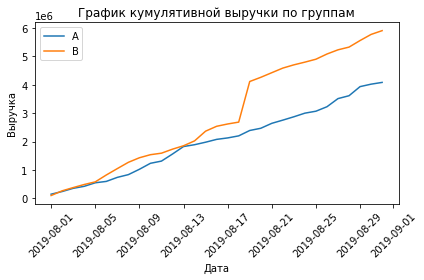

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show();

Вывод: Примерно в середине теста сегмент B начал лидировать по выручке, возможно на это влияют анамально большие заказы, поэтому их нужно будет удалить в конце теста.

2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

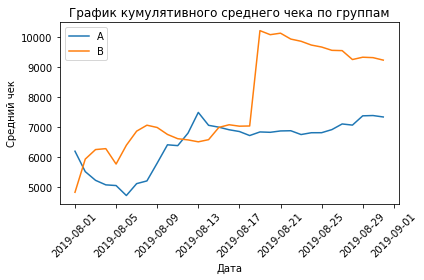

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show();

Вывод: В начале теста кумулятивное значение колеблется в обоих сегментах, затем сегмент В резко вырастает, необходимо провести дополнительный анализ выбросов, для сегманта А кумулятивный средний чек стабилизировался.

3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

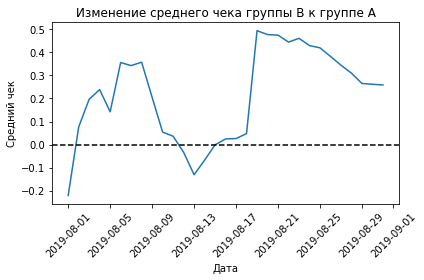

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменение среднего чека группы B к группе А')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show(); 

Вывод: На графике видно, что в некоторые даты были значительные колебания, скорее всего в этот период были совершены аномальные заказы. В данных есть аномалии по количеству заказов и чеку.

4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

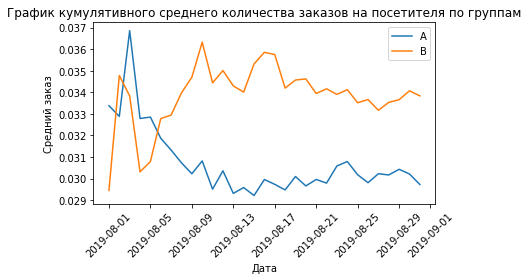

In [18]:
# считаем кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Средний заказ')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show();

Вывод: Сначала сегмент A имел более высокое среднее куммулятивное количество заказов, но затем значение среднего кумулятивного заказа сегмента B стал больше чем у сегмента А.

5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

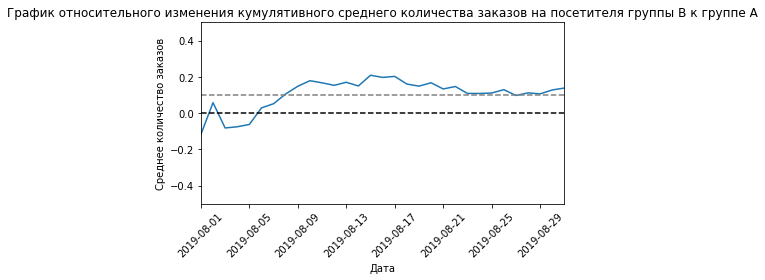

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.1, color='grey', linestyle='--')

plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show(); 

Вывод: Группа B лидирует относительно группы А. Группа B имеет прирост около 20 %, но затем снижается до 10-12 %. В первую неделю происходят резкие колебания, что наблюдалось на предыдущем графике.

6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


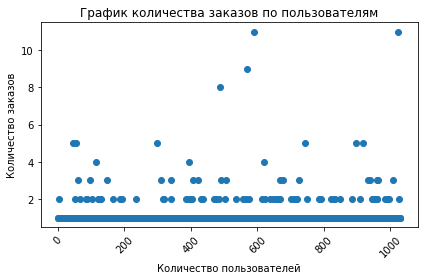

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
) # Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
ordersByUsers.columns = ['visitorId', 'orders'] # Метод .agg({'...' : 'nunique',}) подсчитает число уникальных заказов по сгруппированным данным
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) # Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])  # серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show(); 

Вывод: На графике видно, что большинство пользователей совершило 1 заказ. 2-ух и 3-ех заказов намного меньше, необходимо проверить аномальные они или нет. Примерно с 3-ех заказов начинаются аномальные значения.

7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 97.5, 99])) # Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

[2. 3. 4.]


Вывод: Не более 5 % пользователей совершили 2 заказа, 2.5 % совршило 3 заказа, не более 1 % пользователей совершило 4 заказа.

8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

      transactionId   visitorId       date  revenue group
425   590470918      1920142716 2019-08-19  1294500  B   
1196  3936777065     2108080724 2019-08-15  202740   B   
858   192721366      1316129916 2019-08-27  93940    A   
1136  666610489      1307669133 2019-08-13  92550    A   
744   3668308183     888512513  2019-08-27  86620    B   
682   1216533772     4266935830 2019-08-29  78990    B   
662   1811671147     4266935830 2019-08-29  78990    A   
743   3603576309     4133034833 2019-08-09  67990    A   
1103  1348774318     1164614297 2019-08-12  66350    A   
1099  316924019      148427295  2019-08-12  65710    A   


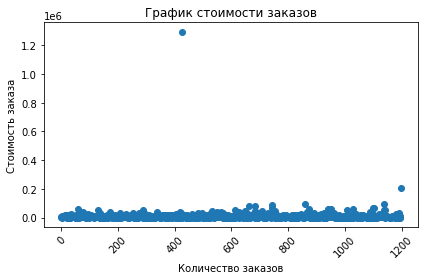

In [22]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show(); 

Вывод: Заказов выше 100.000 всего 2, скорее всего это выбросы. Необходимо скорректировать данные без учета этих аномальных значений.

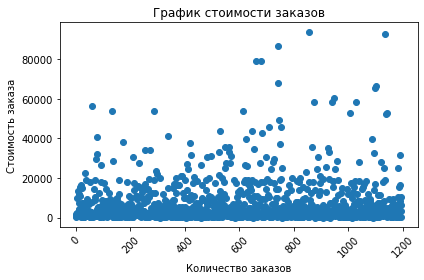

In [23]:
filt_orders = orders[orders['revenue'] < 200000]
x_values = pd.Series(range(0, len(filt_orders['revenue'])))
plt.scatter(x_values, filt_orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show(); #Построил график без аномалий

9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [24]:
print(np.percentile(orders['revenue'], [95, 97.5, 99]))

[28000.  39530.  58233.2]


Вывод: Заказов свыше 28000 примерно 5 %, заказов свыше 58000 примерно 1 %. Можно отсечь заказы свыше 39000 тысяч.

10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Гипотезы: Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть. Уровень значимости = 0.05.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаю статистическую значимость различия в среднем количестве заказов между группами.
Создадам переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов. 

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
print(ordersByUsersA.head())
print(ordersByUsersB.head())

   visitorId  orders
0  8300375    1     
1  11685486   1     
2  54447517   1     
3  66685450   1     
4  78758296   1     
   visitorId  orders
0  5114589    1     
1  6958315    1     
2  8300375    1     
3  39475350   1     
4  47206413   1     


Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:

In [27]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [28]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [31]:
print('P-value: ', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего количества заказов: ', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value:  0.01679
Относительный прирост среднего количества заказов:  0.138


Вывод: P-value 1.68% меньше 5%, нулевую гипотезу отвергаем. В среднем количестве заказов есть статистические различия, разница в среднем количестве заказов на посетителя между группами есть. Относительный прирост группы В к конверсии группы А равен 13.8 %.

11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [32]:
print('P-value: ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение среднего заказа группы В к группе А: ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value:  0.729
Отношение среднего заказа группы В к группе А:  0.259


Вывод: Разница в среднем чеке 25.9% не является статистически значимой на уровне значимости 0.05, не можем сделать вывод о наличии реального эффекта на основании этих данных. Не получилось отвергнуть нулевую гипотезу.

12.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 39000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) 
print(abnormalUsers.shape[0]) #посчитал множество аномальных пользователей, 36 пользователей

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64
36


In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value: ', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение среднего заказа группы В к группе А: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value:  0.01005
Отношение среднего заказа группы В к группе А:  0.162


Вывод: P-value меньше 0.05, нулевую гипотезу отвергаем, как и в результате без очищенных данных. В среднем количестве заказов есть статистические различия. Относительный прирост группы В к конверсии группы А теперь составляет 16.2% вместо 13.8 %.

13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [35]:
print(
    'P-value: ', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Отношение среднего чека группы В к группе А: ', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value:  0.732
Отношение среднего чека группы В к группе А:  0.060


Вывод: P-value немного увеличился, разница между сегментами сократилась с 25.9 % до 6 %. Статистической разницы между сырыми данными и очищенными нет.

14.Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Вывод: Часть 1. Для увеличения выручки можно реализовать следующие гипотезы: 1. Добавить форму подписки на все основные страницы, 2. Добавить блоки рекомендаций товаров на сайт, 3.Добавить два новых канала привлечения трафика.

Вывод: Часть 2. 

В ходе исследования провели анализ двух тестовых групп - А и В. Метрики, которые исследовали - выручка и средний чек, количество заказов.

Выручка в обоих сегментах растет. Примерно в середине теста сегмент B начал лидировать по выручке, возможно на это влияют анамально большие заказы, поэтому их нужно будет удалить. 

На графиках видно, что в некоторые даты были значительные колебания, скорее всего в этот период были совершены аномальные заказы. В данных есть аномалии по количеству заказов и чеку.

Сначала сегмент A имел более высокое среднее куммулятивное количество заказов, но затем значение среднего кумулятивного заказа сегмента B стал больше чем у сегмента А.Группа B имеет прирост по среднему количеству заказов около 20 %, но затем снижается до 10-12 % и график стабилизируется. 

Обнаружил, что большинство пользователей совершило 1 заказ. 2-ух и 3-ех заказов намного меньше, необходимо проверить аномальные они или нет. Примерно с 3-ех заказов начинаются аномальные значения.Не более 5 % пользователей совершили 2 заказа, 2.5 % совршило 3 заказа, не более 1 % пользователей совершило 4 заказа

Отсек заказы со средним чеком свыше 39000 тысяч и с количеством заказов свыше 3-ех.

Вывод: P-value меньше 0.05, нулевую гипотезу отвергаем, как и в результате без очищенных данных. Разница в среднем количестве заказов на посетителя между группами есть. Относительный прирост группы В к конверсии группы А теперь составляет 16.2% вместо 13.8 %. Следовательно в сегменте B среднее количество заказов больше, чем в сегменте А. Средний чек в группах не изменился.

Остановить тест, зафиксировать победу группы В, так как выручка растет благодаря увеличению среднего количества заказов.